In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:


df = pd.read_csv("/content/HistoricalQuotes.csv")
print(df.columns)

# Strip column names (you already did this)
df.columns = df.columns.str.strip()

# Remove $ and extra quotes/spaces from value columns
for col in ['Close/Last', 'Open', 'High', 'Low']:
    df[col] = df[col].replace('[\\$,\']', '', regex=True).str.strip().astype(float)

df['Volume'] = df['Volume'].astype(str).replace('[\',]', '', regex=True).str.strip().astype(int)



Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')


In [3]:
# Convert 'Volume' to int and 'Date' to datetime
df['Volume'] = df['Volume'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

# Sort by ascending date
df = df.sort_values('Date')

# Use relevant columns
data = df[['Open', 'High', 'Low', 'Close/Last', 'Volume']]


In [4]:
# Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Create Time-Series Sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 3])  # Predicting Close price

X = np.array(X)
y = np.array(y)

In [5]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 6: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 7.8919e-04 - val_loss: 0.0021
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 5.7944e-04 - val_loss: 8.4353e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 6.1382e-04 - val_loss: 0.0010
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 5.1697e-04 - val_loss: 0.0015
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 4.6614e-04 - val_loss: 0.0028
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 5.0444e-04 - val_loss: 0.0014
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.9020e-04 - val_loss: 0.0014
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.9640e-04 - val_loss: 8.0960e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.9468e-04 - val_loss: 0.0011
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 3.9603e-04 - val_loss: 7.8775e-04
Epoch 12/20

In [8]:
# Save the model
model.save("lstm_stock_model.h5")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


<ipython-input-9-0c3238b4c525>:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


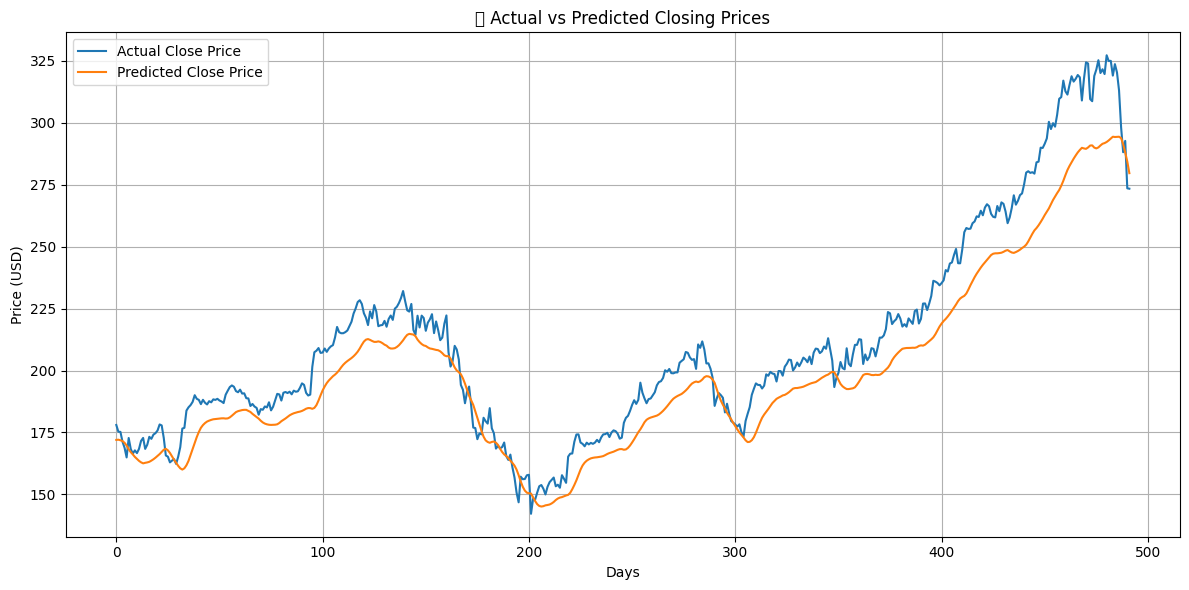

In [9]:
# Evaluate Model

# Predict on test set
predicted = model.predict(X_test)

# Inverse transform only the 'Close' column
# Fill the other columns with zeros to reverse the scaling
predicted_full = np.zeros((len(predicted), 5))
predicted_full[:, 3] = predicted[:, 0]  # 'Close/Last' is the 4th column

# Now apply inverse transform
predicted_close = scaler.inverse_transform(predicted_full)[:, 3]

# Do the same for actual y_test values
y_test_full = np.zeros((len(y_test), 5))
y_test_full[:, 3] = y_test
actual_close = scaler.inverse_transform(y_test_full)[:, 3]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_close, label='Actual Close Price')
plt.plot(predicted_close, label='Predicted Close Price')
plt.title("📈 Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Evaluation Metrics
mse = mean_squared_error(actual_close, predicted_close)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_close, predicted_close)
r2 = r2_score(actual_close, predicted_close)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 213.36
Root Mean Squared Error (RMSE): 14.61
Mean Absolute Error (MAE): 12.25
R² Score: 0.8782
